# Lista 9

## NLTK, HuggingFace, PytorchGeometric

(6pkt + 3pkt)

Na liście znajdują się 3 zadania. Po rozwiązaniu zadań, pokaż kod prowadzącemu i odpowiedz na **pytanie kontrolne** — tylko wtedy przyznajemy punkty. Dodatkowo prześlij zadanie na platformie skos.

**Uwaga**

Jeśli nie jesteś obecny/obecna na ćwiczeniach, odpowiedz na wszystkie pytania pisemnie. Na kolejnych ćwiczeniach możesz być poproszony/poproszona o wytłumaczenie fragmentu kodu w celu sprawdzenia, czy zadanie wykonałeś/wykonałaś samodzielnie. Jeśli zostanie wykryte, że nie rozumiesz swojego rozwiązania - punkty zostaną skreślone. (Nie musisz rozumieć bardzo szczegółowo jak działa konkretna funkcja, ale wymagane jest rozumienie sensu, np. na pytanie co to jest `GNN` (grafowa sieć neuronowa) bardzo dobrą odpowiedzią jest "GNN to grafowa sieć neuronowa, czyli sieć neuronowa, która przetwarza grafy. Grafy to obiekty złożone z wierzchołków i krawędzi, które mówią o relacjach między wiierzchołkami." Nie zostaniesz zapytany o to co robi konkretna warstwa w tej sieci.)

**Zadania bonusowe**
Dodatkowe zadania na wyższą ocenę oznaczone są ⭐️. Zadanie z HuggingFace warte jest 1pkt, a z PytorchGeometric 2pkt.

## NLP z użyciem NLTK i WordCloud (2.5pkt)

1. Pobierz **dowolny tekst z Internetu** (np. artykuł, esej, fragment książki, piosenkę).
2. Zapisz tekst w pliku `tekst.txt`.
3. Wczytaj plik w Pythonie.
4. Zastosuj **co najmniej 3 techniki preprocessingu tekstu** poznane na wykładzie.
5. Na podstawie przetworzonego tekstu wygeneruj **wykres WordCloud**.

Pytania kontrolne:

1. Krótko (2–3 zdania) opisz, jakie techniki preprocessingu zastosowałeś/aś i dlaczego.
2. Co mozesz odczytać z wykresu?

In [ ]:
!curl https://wolnelektury.pl/media/book/txt/pan-tadeusz.txt > tekst.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  482k  100  482k    0     0   334k      0  0:00:01  0:00:01 --:--:--  334k


adam mickiewicz pan tadeusz czyli ostatni zajazd na litwie isbn ksiga pierwsza gospodarstwo powrt panicza spotkanie si pierwsze w pokoiku drugie u stou wana sdziego nauka o grzecznoci podkomorzego uwa


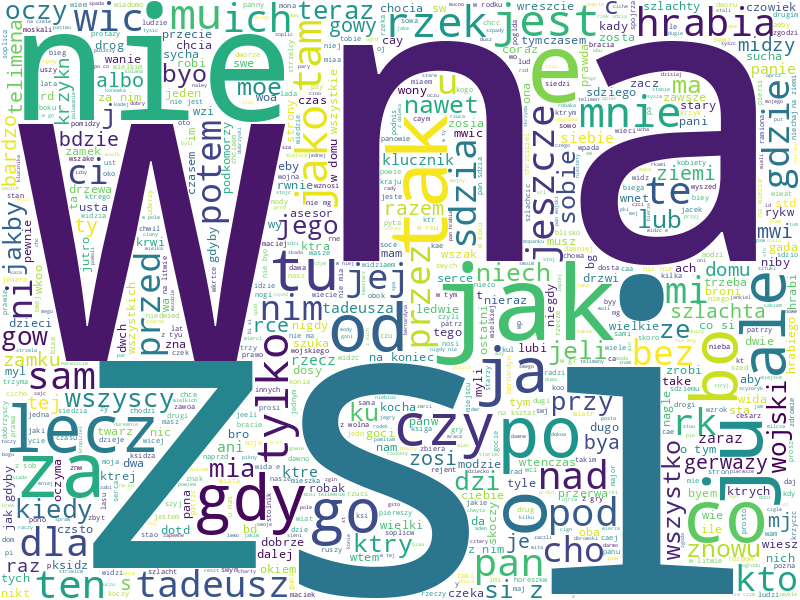

In [ ]:
import re

# Wczytanie pliku
with open("tekst.txt", "r", encoding="utf-8") as f:
    text = f.read()

# zazwyczaj wielkie litery w tym tekście nie zmieniają znaczenia - chociaż przydałoby się je zostawić w nazwach własnych (np Pan Tadeusz)
# Convert to lowercase to avoid duplicate tokens (e.g. "Language" vs "language")
text = text.lower()

# Replace line breaks and tabs with a single space
text = re.sub(r"[\n\r\t]+", " ", text)

# Keep only letters and whitespace
text = re.sub(r"[^a-z\s]", "", text)

# Collapse multiple spaces into one
text = re.sub(r"\s+", " ", text).strip()

print(text[:200])

from wordcloud import WordCloud

wordcloud = WordCloud(
    background_color="white",
    max_words=1000,
    width=800,
    height=600
)

wordcloud.generate(text)
wordcloud.to_image()

na bazie wykresu widizmy że najpopularniejsze są słowa ze stopwords - oznacza to że powinniśmy je odfiltrować, bo nie niosą one wiele informacji

## Klasyfikacja tematyczna tekstu (1.5pkt)

### Opis problemu

Masz krótkie artykuły prasowe.
Zadaniem modelu jest automatycznie odpowiedzieć na pytanie:

**Do jakiej kategorii tematycznej należy dany tekst?**

Użyj datasetu **AG News**, który zawiera: krótkie artykuły prasowe z 4 klas tematycznych.

Klasy:

```
0 – World
1 – Sports
2 – Business
3 – Sci/Tech
```

### Treść zadania

1. Załaduj dataset **AG News** z biblioteki `datasets` (`load_dataset("ag_news", split="test[:5]")`).
2. Załaduj gotowy model Transformer do **klasyfikacji tekstu** (`"text-classification"`, `model="textattack/bert-base-uncased-ag-news"`).
3. Uruchom model na wybranych przykładach z datasetu.
4. Wyświetl:

   * oryginalny tekst,
   * przewidzianą klasę,
   * prawdopodobną etykietę (np. *Sports*).

Pytania kontrolne:
1. Co się stanie jeśli usuniesz argument `model` z pipeline? Jaki model zwróci pipeline?
2. Czy mozesz uzyć tego konkretnego modelu bez pipeline? Jeśli tak, to w jaki sposób?

In [ ]:
from datasets import load_dataset
from transformers import pipeline

# Dataset
dataset = load_dataset("ag_news", split="test[:5]")

# Mapowanie etykiet AG News
label_map = {
    "LABEL_0": "World",
    "LABEL_1": "Sports",
    "LABEL_2": "Business",
    "LABEL_3": "Sci/Tech"
}

# Dedykowany Transformer
classifier = pipeline("text-classification", model="textattack/bert-base-uncased-ag-news")

# Predykcja
for example in dataset:
    text = example["text"]
    true_label = label_map[f"LABEL_{example['label']}"]

    prediction = classifier(text)[0]
    predicted_label = label_map[prediction["label"]]

    print("TEKST:")
    print(text[:300], "...\n")
    print(f"Prawdziwa klasa: {true_label}")
    print(f"Predykcja modelu: {predicted_label} (score={prediction['score']:.2f})")
    print("-" * 60)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/706 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


TEKST:
Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul. ...

Prawdziwa klasa: Business
Predykcja modelu: Business (score=1.00)
------------------------------------------------------------
TEKST:
The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com) SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date f ...

Prawdziwa klasa: Sci/Tech
Predykcja modelu: Sci/Tech (score=1.00)
------------------------------------------------------------
TEKST:
Ky. Company Wins Grant to Study Peptides (AP) AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of p

otrzymamy wtedy domyśnny model

*model (str or PreTrainedModel, optional) — The model that will be used by the pipeline to make predictions. This can be a model identifier or an actual instance of a pretrained model inheriting from PreTrainedModel.  
If not provided, the default for the task will be loaded.*

tak, wystarczy skorzystać z funkcji `from_pretrained` oraz podać jest jaki model chcemy załadować

## Hugging Face Spaces (1pkt)

### Treść zadania

1. Wejdź na platformę **Hugging Face Spaces**.
2. Wybierz **jedną istniejącą aplikację**.
3. Uruchom aplikację i przetestuj ją na własnym przykładzie.

Pytania kontrolne:
Brak - zademonstruj wyniki podczas ćwiczeń.

https://drive.google.com/file/d/1WNHtkTvti79SBnkb77p1ytzQJgfDeU8Q/view?usp=sharing

## ⭐️ Question Answering

### Opis zadania

Zadaniem modelu jest automatyczne odpowiadanie na różne pytania na podstawie fragmentów tekstu.

### Treść zadania

1. Załaduj dataset **SQuAD** (``squad``).
2. Wybierz kilka przykładów (np. 5: ``split="validation[:5]"``) i wypisz je, żeby zobaczyć z jakimi danymi i etykietami będziesz pracować.
3. Załaduj model Transformer do **Question Answering**. Użyj `pipeline` (zadanie: ``question-answering``, model: ``distilbert-base-uncased-distilled-squad``).
4. Uruchom model w pętli dla tych kilku przykładów. Porównaj odpowiedzi modelu z poprawnymi odpowiedziami z datasetu.
5. Krótko opisz wnioski.

In [6]:
from datasets import load_dataset
from transformers import pipeline

dataset = load_dataset("squad", split="validation[:5]")

qa_pipeline = pipeline("question-answering", model="distilbert-base-uncased-distilled-squad")


for i, example in enumerate(dataset):
    context = example["context"]
    question = example["question"]
    correct_answer = example["answers"]["text"][0] if example["answers"]["text"] else "N/A"

    prediction = qa_pipeline(question=question, context=context)

    print(f"PRZYKŁAD {i + 1}")
    print("PYTANIE:")
    print(question, "\n")
    print("ODPOWIEDŹ MODELU:")
    print(f"{prediction['answer']}\n(score={prediction['score']:.2f})\n")
    print("POPRAWNA ODPOWIEDŹ:")
    print(correct_answer)
    print("======================================================================")


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

plain_text/validation-00000-of-00001.par(…):   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/451 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


PRZYKŁAD 1
PYTANIE:
Which NFL team represented the AFC at Super Bowl 50? 

ODPOWIEDŹ MODELU:
Denver Broncos
(score=0.99)

POPRAWNA ODPOWIEDŹ:
Denver Broncos
PRZYKŁAD 2
PYTANIE:
Which NFL team represented the NFC at Super Bowl 50? 

ODPOWIEDŹ MODELU:
Carolina Panthers
(score=1.00)

POPRAWNA ODPOWIEDŹ:
Carolina Panthers
PRZYKŁAD 3
PYTANIE:
Where did Super Bowl 50 take place? 

ODPOWIEDŹ MODELU:
Levi's Stadium
(score=0.50)

POPRAWNA ODPOWIEDŹ:
Santa Clara, California
PRZYKŁAD 4
PYTANIE:
Which NFL team won Super Bowl 50? 

ODPOWIEDŹ MODELU:
Denver Broncos
(score=0.26)

POPRAWNA ODPOWIEDŹ:
Denver Broncos
PRZYKŁAD 5
PYTANIE:
What color was used to emphasize the 50th anniversary of the Super Bowl? 

ODPOWIEDŹ MODELU:
gold
(score=0.98)

POPRAWNA ODPOWIEDŹ:
gold


Model zazwyczaj dobrze radzi sobie z odpowiadaniem na pytania na podstawie podanego kontekstu.  
W niektórych przypadkach, predykcja jest bardzo bliska lub tylko semantycznie poprawna.

## ⭐️ Dane grafowe w PyTorch Geometric

### Wczytanie datasetu

1. Wczytaj dataset **ENZYMES** z kolekcji TU Dortmund (``data = TUDataset(root="/tmp/ENZYMES", name="ENZYMES")``).
2. Sprawdź:

   * ile grafów zawiera dataset,
   * ile cech ma każdy wierzchołek (`` dataset.num_classes``),
   * ile jest klas (``dataset.num_node_features``).

---

### Analiza pojedynczego grafu

1. Pobierz **pierwszy graf** z datasetu (``dataset[0]``).
2. Wypisz:

   * liczbę wierzchołków,
   * liczbę krawędzi,
   * rozmiar macierzy cech wierzchołków `x`,
   * etykietę grafu `y`.
3. Sprawdź, czy graf jest skierowany (``.is_undirected()``).

---

### Wizualizacja grafu (Kod jest zaimplementowany - nie musisz nic robić)

1. Narysuj pierwszy graf:

   * wierzchołki jako punkty,
   * krawędzie jako linie.
2. (Opcjonalnie) Pokoloruj wierzchołki według jednej z cech.

---

### DataLoader i batchowanie

1. Utwórz `DataLoader` z:

   * `batch_size = 32`,
   * `shuffle = True`.
2. Pobierz jeden batch i:

   * wypisz go,
   * sprawdź, ile grafów zawiera,
   * wypisz pierwsze kilka wartości wektora `batch`.

Number of graphs in dataset: 600
Number of classes: 6
Number of node features: 3

Single graph:
Data(edge_index=[2, 168], x=[37, 3], y=[1])
Number of nodes: 37
Number of edges: 168
Shape of node features x: torch.Size([37, 3])
Graph label y: 5
Is the graph undirected: True


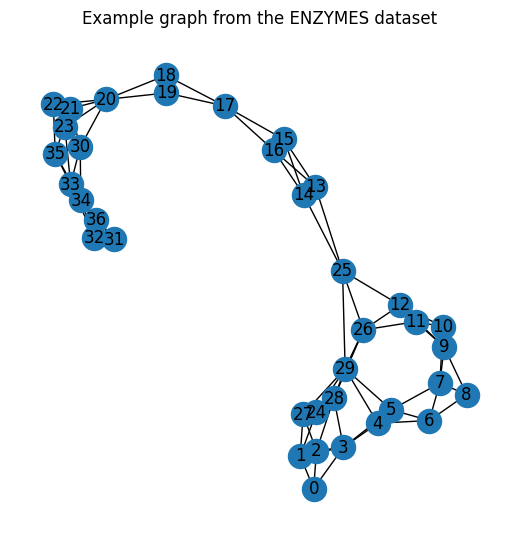


Batch:
DataBatch(edge_index=[2, 3886], x=[1012, 3], y=[32], batch=[1012], ptr=[33])
Number of graphs in batch: 32
Shape of batch vector: torch.Size([1012])
First 10 entries of batch vector: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [ ]:
# ============================================================
# Exploring Graph Data in PyTorch Geometric (ENZYMES dataset)
# ============================================================

# Basic imports
import torch
import matplotlib.pyplot as plt
import networkx as nx

# PyTorch Geometric imports
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader
from torch_geometric.utils import to_networkx

# ------------------------------------------------------------
# 1. Load the dataset
# ------------------------------------------------------------
# ENZYMES is a graph classification dataset
# Each element in the dataset is a separate graph

dataset = # Uzupełnij

print("Number of graphs in dataset:", # Uzupełnij
print("Number of classes:", # Uzupełnij
print("Number of node features:", # Uzupełnij

# ------------------------------------------------------------
# 2. Inspect a single graph
# ------------------------------------------------------------
# Take the first graph from the dataset

data = dataset[0]

print("\nSingle graph:")
print(# Uzupełnij)

print("Number of nodes:", # Uzupełnij
print("Number of edges:", # Uzupełnij
print("Shape of node features x:", # Uzupełnij
print("Graph label y:", # Uzupełnij
print("Is the graph undirected:", # Uzupełnij

# ------------------------------------------------------------
# 3. Visualize the graph
# ------------------------------------------------------------
# Convert PyG graph to NetworkX for visualization
# This is ONLY for visualization purposes

G = to_networkx(data, to_undirected=True)

plt.figure(figsize=(5, 5))
nx.draw(
    G,
    node_size=300,
    with_labels=True
)
plt.title("Example graph from the ENZYMES dataset")
plt.show()

# ------------------------------------------------------------
# 4. Create a DataLoader and inspect a batch
# ------------------------------------------------------------
# DataLoader merges many graphs into one batch

loader = # Uzupełnij

batch = next(iter(loader))

print("\nBatch:")
print(# Uzupełnij)

print("Number of graphs in batch:", # Uzupełnij
print("Shape of batch vector:", # Uzupełnij

# Show how nodes are assigned to graphs
print("First 10 entries of batch vector:", # Uzupełnij
